## Logistic Regression

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('../../../data/processed/tokenized_data_sample_with_custom_stopwords.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['reviewTokens'], df['overall'], test_size=0.2, random_state=42)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

# Initialize and fit the CountVectorizer to transform text data into bag-of-words vectors
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [37]:
# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_bow, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test_bow)

In [38]:
# Calculate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.60      0.69      0.64      1202
         2.0       0.29      0.12      0.17       769
         3.0       0.41      0.27      0.33      1131
         4.0       0.41      0.26      0.31      1682
         5.0       0.73      0.91      0.81      5216

    accuracy                           0.64     10000
   macro avg       0.49      0.45      0.45     10000
weighted avg       0.59      0.64      0.61     10000



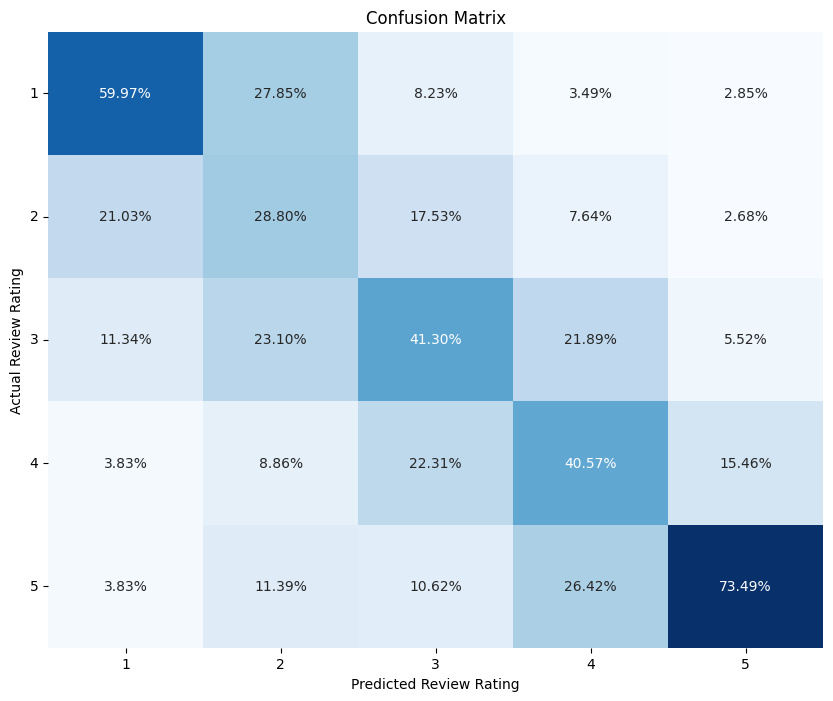

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ class weighting)

In [40]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))

# Initialize and train the logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights, solver='liblinear')
model.fit(X_train_bow, y_train)

LogisticRegression(class_weight={1.0: 1.5838447832112452,
                                 2.0: 2.733173898189272,
                                 3.0: 1.7989655947829997,
                                 4.0: 1.1904761904761905,
                                 5.0: 0.383601054902901},
                   solver='liblinear')

In [41]:
# Evaluate the model
y_pred = model.predict(X_test_bow)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.58      0.70      0.63      1202
         2.0       0.23      0.20      0.21       769
         3.0       0.36      0.35      0.35      1131
         4.0       0.40      0.29      0.34      1682
         5.0       0.81      0.85      0.83      5216

    accuracy                           0.63     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.62      0.63      0.62     10000



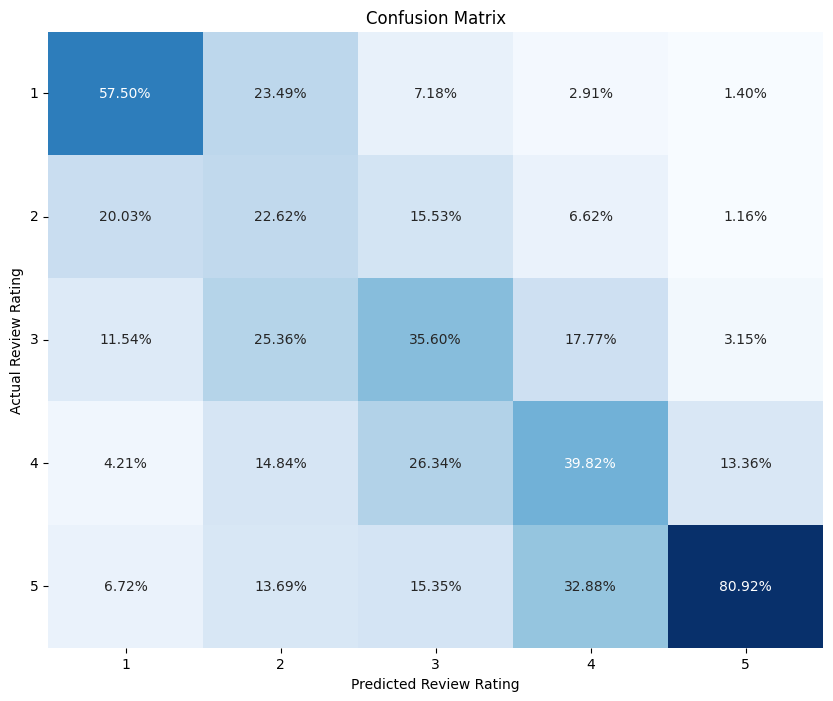

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ undersampling the majority class)

In [43]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class (5-star reviews) automatically
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_bow, y_train)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test set
y_pred2 = model.predict(X_test_bow)

In [44]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         1.0       0.54      0.66      0.59      1202
         2.0       0.21      0.28      0.24       769
         3.0       0.30      0.34      0.32      1131
         4.0       0.34      0.36      0.35      1682
         5.0       0.85      0.72      0.78      5216

    accuracy                           0.58     10000
   macro avg       0.45      0.47      0.46     10000
weighted avg       0.61      0.58      0.59     10000



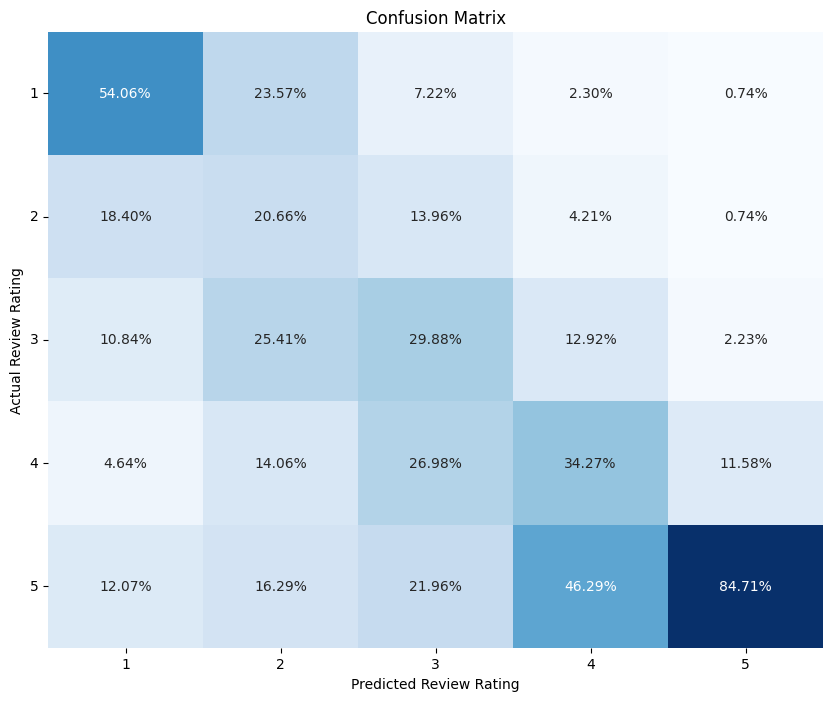

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ oversampling minority classes)

In [46]:
from imblearn.over_sampling import RandomOverSampler

# Oversample the minority classes (1 to 4-star reviews) automatically
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_bow, y_train)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test set
y_pred3 = model.predict(X_test_bow)


C:\Users\lucym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         1.0       0.56      0.63      0.60      1202
         2.0       0.23      0.28      0.26       769
         3.0       0.30      0.35      0.32      1131
         4.0       0.34      0.35      0.35      1682
         5.0       0.84      0.75      0.79      5216

    accuracy                           0.59     10000
   macro avg       0.45      0.47      0.46     10000
weighted avg       0.61      0.59      0.60     10000



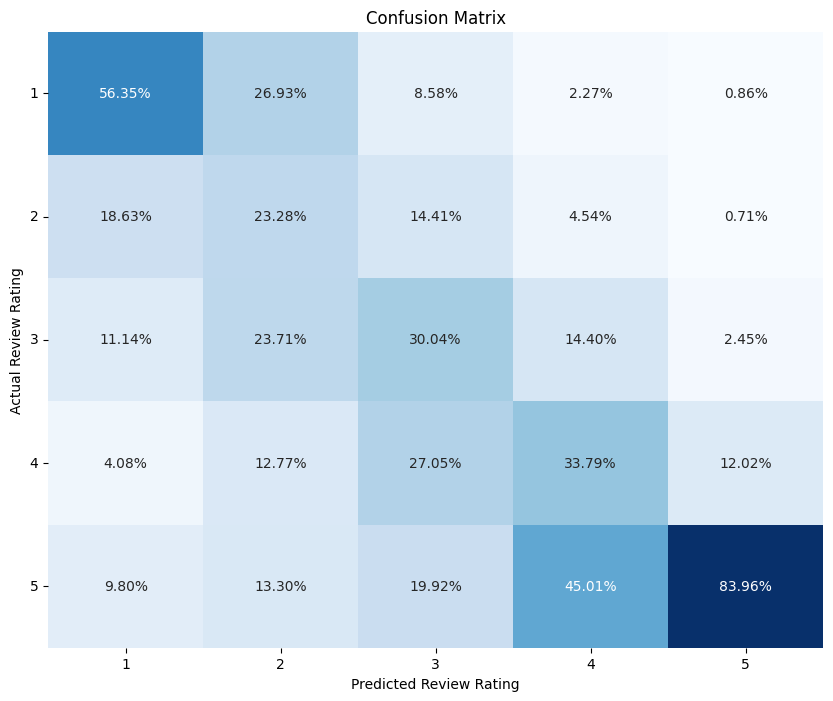

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()


## Logistic Regression (w/ SMOTE sampling technique)

In [49]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_bow, y_train)

# Initialize and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predict the target variable for the test set
y_pred = model.predict(X_test_bow)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.58      0.66      0.62      1202
         2.0       0.24      0.25      0.25       769
         3.0       0.34      0.36      0.35      1131
         4.0       0.34      0.37      0.35      1682
         5.0       0.82      0.75      0.78      5216

    accuracy                           0.59     10000
   macro avg       0.46      0.48      0.47     10000
weighted avg       0.61      0.59      0.60     10000



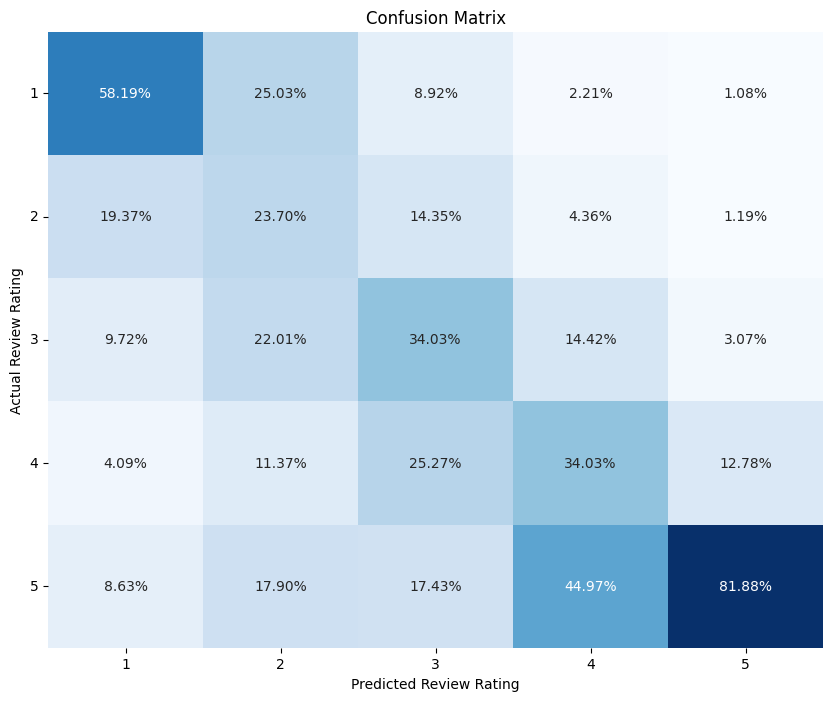

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=0)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Review Rating')
plt.ylabel('Actual Review Rating')
plt.yticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, rotation=0)
plt.xticks(labels=[1, 2, 3, 4, 5], ticks=np.arange(5) + 0.5, )
plt.show()
